[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_3_Preprocesamiento/notebook/01EDAwoAns_Copy.ipynb)

# Exploración Visual de los Datos

<img src="https://www.anychart.com/blog/wp-content/uploads/2017/10/data-visualization-weekly-_.png" width="1000" align="middle">

---

## Librerias de visualización 1: Matplotlib

Matplotlib es una libreria de python que permite graficar datos en Figuras (ventanas, widgets de Jupyter, etc.), cada uno de los cuales puede contener uno o más ejes (es decir, un área donde los puntos se pueden especificar en términos de coordenadas $(x,y)$ (o $(theta,r)$ en una gráfica polar, o $(x,y,z)$ en una gráfica 3D, etc.). 

Existen esencialmente dos formas para utilizar `Matplotlib`:

  - Estilo 'Orientado-a-Objetos', donde explicitamente se crean *figuras* y *ejes* las cuales se modifican a través de métodos.
  - Confiar en `pyplot` para que automáticamente cree figuras, ejes, subfiguras, etc.

De estas dos formas, la más sencilla es la segunda. Por ejemplo para crear una figura con ejes usamos `pyplot.subplots`. Luego podemos usar `Axes.plot` para dibujar algunos datos en los ejes:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

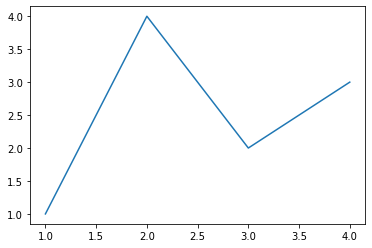

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

En otros lenguajes de programación como R o Matlab no requieren la creación explícita de ejes. Por ejemplo, en MATLAB, uno puede simplemente hacer lo siguiente para obtener el gráfico anterior.

`plot([1, 2, 3, 4], [1, 4, 2, 3])  % MATLAB plot.`

De hecho, puede hacer lo mismo en Matplotlib: para cada método de graficación `Axes`, hay una función correspondiente en el módulo `matplotlib.pyplot` que grafica sobre los ejes "actuales", creando esos ejes (y su figura principal) si no existen todavía. Entonces, el ejemplo anterior se puede escribir como

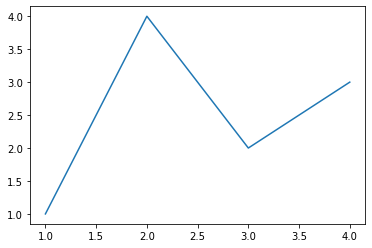

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

### Partes de una `Matplotlib figure`

- Figura `Figure`
- Ejes `Axes`
- Eje `Axis`
- Elementos artísticos `Artist`

<img src="https://matplotlib.org/stable/_images/anatomy.png" width="800" align="middle">

#### `Figure`
La figura da seguimiento a todos los ejes `axes` secundarios.

También contiene elementos artísticos "especiales" (títulos, leyendas de figuras, etc.) y el **lienzo** (canvas). Aunqué el lienzo es crucial ya que es el objeto en donde realmente se hace el dibujo, como usuario es más o menos invisible. 

Una figura puede contener cualquier número de ejes `axes`, pero normalmente tendrá al menos uno. 

Una buena práctica es crear los ejes junto con la figura, pero se pueden agregar los ejes más adelante para construir diseños de ejes más complejos.

#### `Axes`
Esto es lo que piensas como 'un gráfico'.

Es la región de la imagen dentro del espacio definido por los datos. 

Una figura determinada puede contener muchos ejes, pero solo un objeto de ejes `Axes` puede estar en una figura `Figure`. 

Los ejes `Axes` contienen dos (o tres en el caso de 3D) objetos de eje `Axis` (**tenga en cuenta la diferencia entre ejes y eje**) que se encargan de los límites de datos (los límites de datos también se pueden controlar a través de los métodos `axes.Axes.set_xlim()` y `axes.Axes.set_ylim()`). 

Cada objeto de eje `Axes` tiene un título (establecido a través de `set_title()`), una etiqueta para el eje x `set_xlabel()` y el eje y `set_ylabel()`.

La clase Axes y sus funciones miembro son el punto de entrada principal para trabajar con la interfaz OO.

#### `Axis`

Estos son objetos parecidos a una recta numérica. 

Se encargan de establecer los límites del gráfico y generar los ticks (las marcas en el eje) y ticklabels (cadenas que etiquetan los ticks). 

La ubicación de los ticks la determina un objeto `Locator` y un `Formmater` formatea las cadenas de ticklabel. 

La combinación del `Locator` y el `Formmater` correctos proporciona un control muy preciso sobre las ubicaciones y las etiquetas de las marcas.

#### `Artist`

Básicamente, todo lo que puede ver en la figura es un artista (incluso los objetos `Figura`, `Ejes` y `Eje`). 

Esto incluye objetos de texto `Text`, objetos `Line2D`, objetos de colecciones `collections`, etc. 

Cuando se despliega la figura, todos los efectos artísticos se dibujan en el lienzo. 

La mayoría de los efectos artísticos corresponden a ejes; por lo que los efectos artísticos de este tipo no puede ser compartido por varios ejes, ni moverse de uno a otro.

### Tipos de entradas

Es importante recalcar que `matplotlib` esta diseñada para funcionar con `numpy.array` o `numpy.ma.maskey_array`.

Otras clases como `pandas.DataFrame` o `numpy.matrix` pueden o no funcionar. Por lo que es una buena práctica convertir todo a objetos de tipo `numpy.array` antes que cualquier cosa.

In [4]:
import pandas

a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
print(type(a))
a_asarray = a.values
a_asarray.dtype

<class 'pandas.core.frame.DataFrame'>


dtype('float64')

In [5]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

### Estilos de graficación

- Estilo Orientado a Objetos

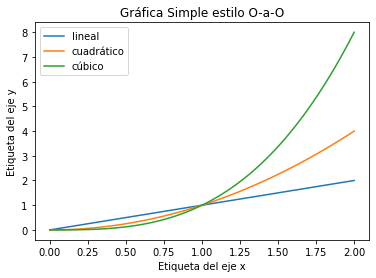

In [6]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.

ax.plot(x, x, label='lineal')  # Plot some data on the axes.
ax.plot(x, x**2, label='cuadrático')  # Plot more data on the axes...
ax.plot(x, x**3, label='cúbico')  # ... and some more.
ax.set_xlabel('Etiqueta del eje x')  # Add an x-label to the axes.
ax.set_ylabel('Etiqueta del eje y')  # Add a y-label to the axes.
ax.set_title("Gráfica Simple estilo O-a-O")  # Add a title to the axes.
ax.legend()  # Add a legend.

- Estilo pyplot

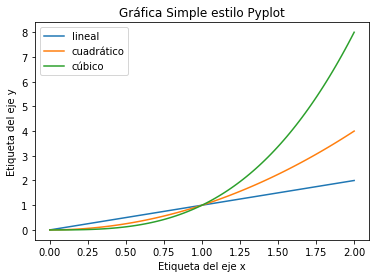

In [7]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='lineal')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='cuadrático')  # etc.
plt.plot(x, x**3, label='cúbico')
plt.xlabel('Etiqueta del eje x')
plt.ylabel('Etiqueta del eje y')
plt.title("Gráfica Simple estilo Pyplot")
plt.legend()

La documentación y los ejemplos de Matplotlib usan los enfoques OaO y pyplot (que son igualmente poderosos)

El uso del estilo depende de cada uno, sin embargo, es preferible elegir uno de ellos y no mezclarlos. 

En general, se sugiere el uso de pyplot cuando se requieran gráficos interactivos (por ejemplo, en un cuaderno de Jupyter) y  el estilo OaO para gráficas no interactivas (en funciones y scripts que están destinados a ser reutilizados como parte de un proyecto más grande).

### Formateo de estilos del gráfico

Para cada par de argumentos $x, y$, hay un tercer argumento opcional que es la cadena de formato que indica el *color y el tipo de línea* del gráfico. 

Las letras y símbolos de la cadena de formato fueron tomadas de MATLAB.

Se concatena una cadena de color con una cadena de estilo de línea. La cadena de formato predeterminada es 'b-', que es una línea azul sólida. 

Por ejemplo, para gráficar una linea con círculos rojos se especificaría

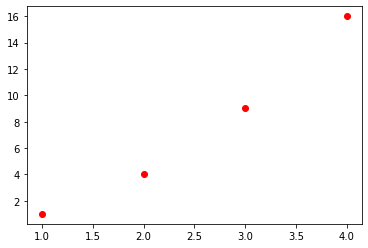

In [8]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
#plt.axis([0, 6, 0, 20])
plt.show()

Para más información sobre colores y estilos de marcadores consultela en la liga de [pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)


El siguiente ejemplo ilustra la graficación de varias líneas con diferentes estilos de formato en una sola linea de código usando arreglos.

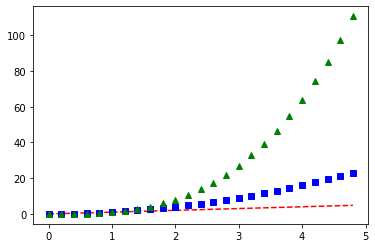

In [9]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### Graficación con cadenas de palabras claves

En algunos casos, podemos accesar a la información de una variable a través de cadenas de caracteres. Por ejemplo, un objeto de `pandas.DataFrame`.

Matplotlib permite la graficación de un objeto al pasarlo como un argumento en la palabra clave `data`. Por ejemplo:

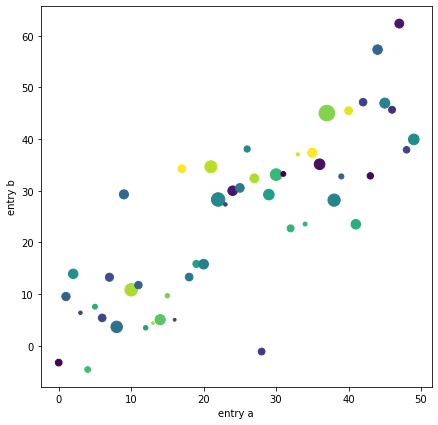

In [10]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.figure(figsize=(7,7))
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

---------------------

## Histogramas 1D
Uno de los primeros pasos en DS, es la **exploración visual de los datos**.

Una de las herramientas principales y más simple de **DataViz** son los histogramas. Inicialmente, estos son de gran ayuda para comprender un conjunto de datos. Anteriormente vieron dicha función herramienta, daré algunos detalles extras.

### Estilos de Graficación 

Una función de pyplot es que podemos escoger la **ESTÉTICA** de las gráficas con la directiva ``plt.style``. Por ejemplo, aqui se muestran el estilo ``seaborn-white`` y el ``classic`` parecido a las horribles gráficas de MATLAB. Yo en lo particular prefiero estilo R (``ggplot``).

Una lista de estilos puede encontrarse en https://matplotlib.org/3.2.0/gallery/style_sheets/style_sheets_reference.html, o con la instrucción ``pyplot.style.available``.

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')
plt.style.use('classic')
plt.style.use('ggplot')
plt.style.use('Solarize_Light2')

In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Generador de datos aleatorios 

Es importante entender, que las **diferentes formas** que sigan las distribuciones de las variables, nos permitirá elegir mejor entre modelos de acuerdo a sus propiedades.

La lista de generadores de números aleatorios disponibles para numpy puede encontrarse en https://numpy.org/doc/1.18/reference/random/generator.html.

In [13]:
np.random.seed(1)
data = np.random.standard_normal(10000) #Distribución Normal, media =0, sd=1

data1 = np.random.uniform(low=-3, high = 3, size = 10000) #Distribucion Uniforme
data2 = np.random.logseries(p=.33, size = 10000)*3 #Distribución logaritmica
data3 = np.random.lognormal(size=10000) #Distribución log-normal

### Ejercicio: Grafiquemos los datos

1. Graficar los histogramas de los cuatro conjuntos utilizando la función ``subplot``.

2. Graficarlas los histogramas en un grid de $2 \times 2$

3. Usar solo ticks y títulos de los ejes exteriores usando la función ``label_outer()``.

Utilice para ello el siguiente material

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot

<img src="https://i.pinimg.com/564x/64/fa/8b/64fa8ba87927253de443b85f46f6574b.jpg" width="500" align="middle">



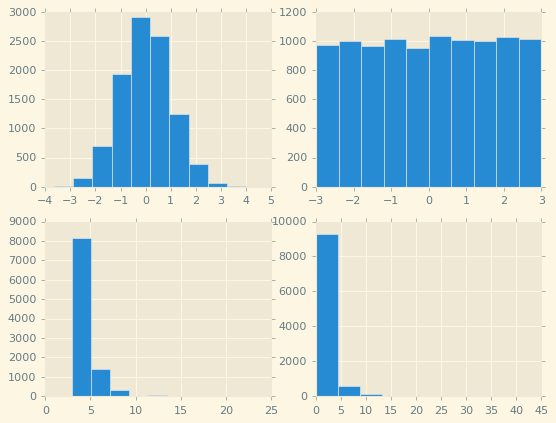

In [14]:
# Your Answer HERE

La función ``hist()`` tiene muchas opciones que pueden ser manipuladas para mejorar tanto los cálculos como la apariencia de la gráfica. Por ejemplo, podemos modificar los **bins**, el tipo de histograma con **histtype**, la orientación, color, etc.

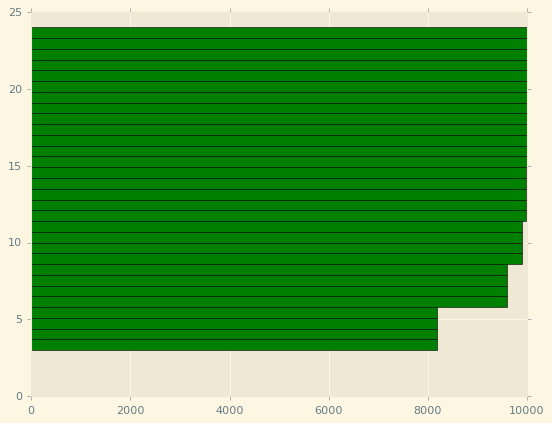

In [15]:
# import matplotlib.patches

plt.hist(data2,
         bins=30,
         histtype='bar', 
         color='green',
         orientation ='horizontal', 
         edgecolor = 'black',
         cumulative=True);

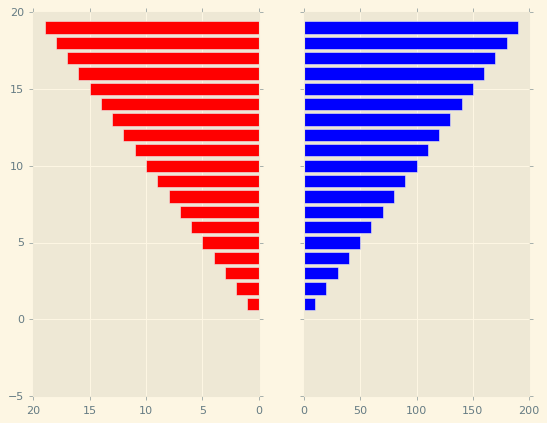

In [16]:
import matplotlib.pyplot as plt

y = range(20)
x1 = range(20)
x2 = range(0, 200, 10)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, x1, align='center', color='red')
axes[1].barh(y, x2, align='center', color='blue')
axes[0].invert_xaxis()
plt.show()

#### Ejercicio:

Cree una figura que combine los histogramas de los conjuntos ``Data``, ``Data1`` y ``Data3``. Acotelos entre un rango $[-5,10]$, utilice 60 bins y``histtype='stepfilled'``. 

Compare este histograma contra su copia modificando la transparencia con el parámetro ``alpha``. La comparación se debe hacer utilizando un grid $2 \times 1$.

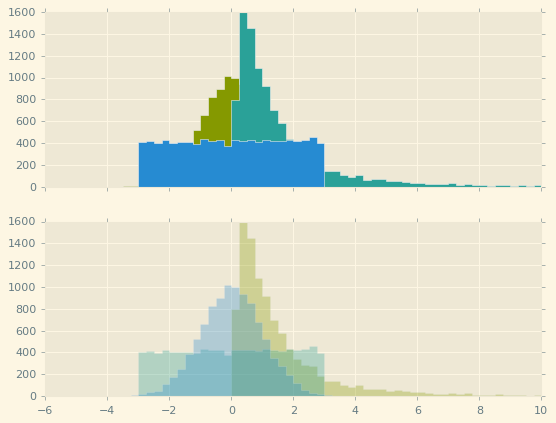

In [17]:
# Your answer here

En algunos casos, lo único que buscamos es calcular el histograma (es decir, los conteos por 'bin') sin desplegar nada. En este caso podemos utilizar la función ``np.histogram()`` de numpy:

In [18]:
counts, bin_edges = np.histogram(data, bins=10)
print(counts,bin_edges)
# print(bin_edges[:-1])

# print(bin_edges[1:bin_edges.shape[0]]-bin_edges[0:(bin_edges.shape[0]-1)])

# plt.bar(bin_edges,counts, width=0.7683289)
# plt.bar(bin_edges[:-1],counts, width=0.7683289);
# plt.show()

# plt.hist(data, bins=10);

[  14  151  699 1932 2909 2594 1248  388   55   10] [-3.6564401  -2.88811118 -2.11978227 -1.35145336 -0.58312444  0.18520447
  0.95353339  1.7218623   2.49019122  3.25852013  4.02684904]


---
## Histogramas Bi-Dimensionales

Del mismo modo que creamos histogramas en una dimensión, esto es, dividiendo una variable 1D en 'bins', también podemos crear histogramas en dos dimensiones dividiendo los datos entre 'bins' bidimensionales.
Veremos brevemente varias formas de hacer esto aquí.

### ``plt.hist2d``: Histograma en 2D

La forma más directa de realizar esto es utilizando la función ``plt.hist2d`` de  Matplotlib.

Utilicemos ``data`` y ``data1`` para crear el histograma 2D.

https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html

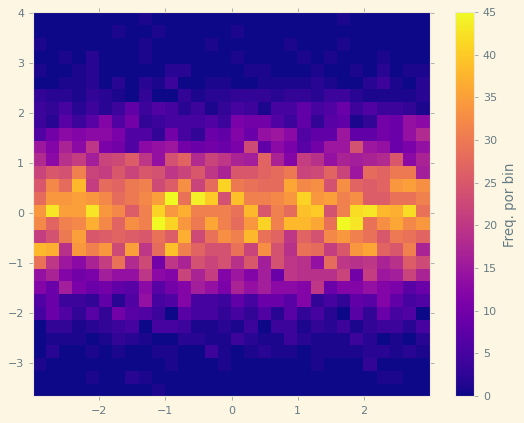

In [19]:
plt.hist2d(data1, data, bins=30, cmap='plasma')
cb = plt.colorbar()
cb.set_label('Freq. por bin')

### ``plt.hexbin``: Bins Hexagonales

El histograma 2D crea una teselación con un patrón de cuadrados. Otra forma natural para tal teselación es utilizando como patrón hexágonos regulares.
Para este propósito, Matplotlib proporciona la rutina `` plt.hexbin``, el cual representa a un conjunto de datos bidimensional dentro de una cuadrícula de hexágonos:

1.   List item
2.   List item



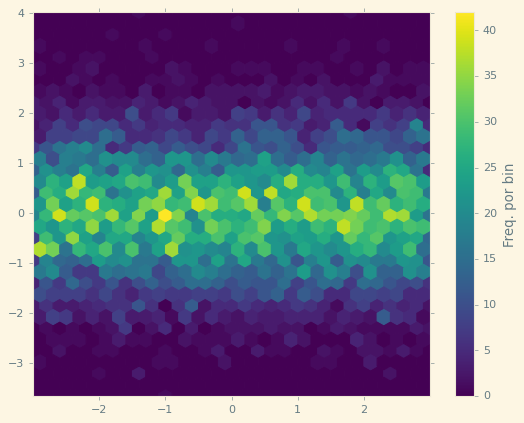

In [20]:
plt.hexbin(data1, data, gridsize=30, cmap='viridis')
cb = plt.colorbar(label='Freq. por bin')

Al igual que las otras gráficas de PyPlot, ``plt.hexbin`` tiene numerosas opciones, incluyendo la capacidad para especificar el peso de cada punto, y la capacidad de cambiar la salidad en cada bin utilizando una función de agregación de NumPy (la media de los pesos, desviación estandar, etc.).

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hexbin.html

Por otra parte, puede ser que solo querramos las frecuencias conjuntas, como lo hicimos para ``np.histogram``. En este sentido, ``NumPy`` cuenta con la función ``np.histogram2d``, la cual se puede usar de la siguiente forma:

In [21]:
counts, xedges, yedges = np.histogram2d(data1, data, bins=10)

En general, se puede calcular las frecuencias conjuntas utilizando la función ``np.histogramdd``.

---
## ``JoyPy``: ¿Joyplot o Ridgeline plot?

<img src="https://i.pinimg.com/originals/4d/13/11/4d1311bf34a7973db8080fd94780e6e4.jpg" width="600" align="middle">

El nombre "Joy Plot" aparentemente fue acuñado por Jenny Bryan en abril de 2017, como respuesta a una de sus visualizaciones usando este estilo en lenguage ``R``.

    ¿Qué es un Joyplot?

Los **Joyplots** son **gráficos de densidad apilados y parcialmente superpuestos**. Son una buena manera de comparar visualmente las distribuciones, especialmente aquellas que cambian en una dimensión (por ejemplo, con el tiempo).

El nombre se refiere a la clásica portada del álbum de 1979 **Unknown Pleasures** de Joy Division, que en realidad era un joyplot de intensidades de radio del primer púlsar conocido. Desafortunadamente, cuando el termino de esta visualización **joyplot** se popularizo, nadie en la comunidad de ciencia de datos estaba al tanto del origen del nombre de la banda "Joy Division". Como se describe en el libro *House of Dolls*, **las divisiones de alegría** eran grupos de mujeres judías en campos de concentración nazis mantenidas para el placer sexual de los soldados. La banda Joy Division tomó su nombre directamente de este libro [^joydivision].

Debido a esta razón, en el paquete que hace este gráfico en ``R`` se decidió renombrar este tipo de gráfico como **ridgeline plots** [^ridgeplot].

[^joydivision]: https://en.wikipedia.org/wiki/Joy_Division.
[^ridgeplot]:https://serialmentor.com/blog/2017/9/15/goodbye-joyplots

Sin embargo, aqui en python se sigue llamando joyplot. Por lo tanto, lo primero que haremos es instalar la libreria ``joypy``.

<!-- https://sbebo.github.io/posts/2017/08/01/joypy/ -->


In [22]:
!pip install joypy # install joypy

ERROR: Invalid requirement: '#'


#### Ahora comparemos las 4 distribuciones utilizando ``joypy.joyplot``.

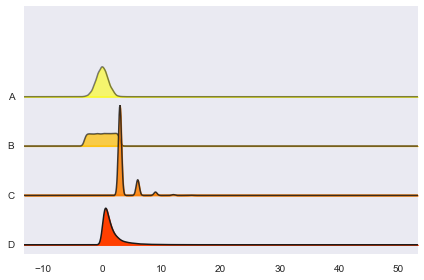

In [42]:
import joypy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pepito = np.transpose([data, data1, data2, data3])
tmp_df = pd.DataFrame(pepito, columns=['A','B','C','D'])

fig, axes = joypy.joyplot(tmp_df,colormap=cm.autumn_r,fade=True);

### Ejercicio:

Dada la pandemia desencadenada por el COVID19, deseamos entender mejor la propagación del virus. Anteriormente obtuvimos un archivos CSV que contiene ***los casos confirmados acumulados por día y país***.

Utiliza este archivo para:

1. Calcular el número de casos ***nuevos*** por día y país. El cálculo solo será desde el dia 100 hasta el día 200 desde el comienzo del registro. Para calcular el número de casos nuevos use la funcion `pandas.diff()`.

2. Comparar el incremento de casos por dia utilizando un ``joyplot``.


https://sbebo.github.io/posts/2017/08/01/joypy/

https://github.com/sbebo/joypy/blob/master/Joyplot.ipynb

https://github.com/sbebo/joypy/blob/master/joypy/joyplot.py

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html


(19200, 6)


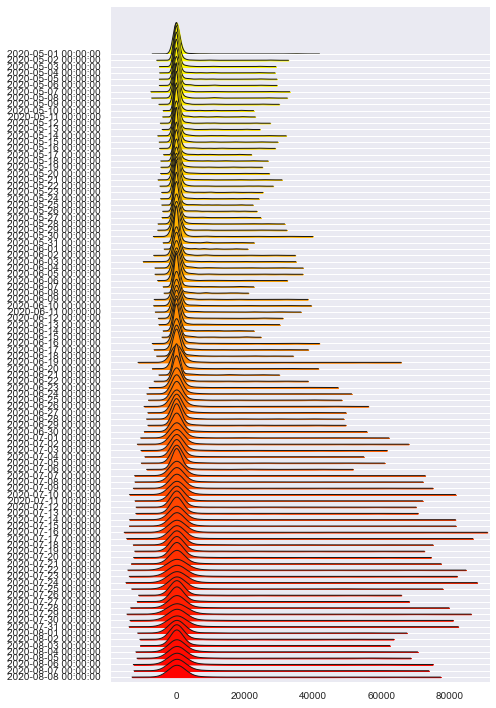

In [47]:
#Your answer here

Evidentemente, no hay nuevos casos **negativos**.

¿Qué necesitamos hacer para ajustar el joyplot?

---
## Gráficos de Dispersión (Scatter Plot) y ``lmplot``.

Un diagrama o gráfico de dispersión, es un tipo de diagrama matemático que utiliza **coordenadas cartesianas** para **mostrar valores** de, típicamente, **dos variables de un conjunto de datos**. 

**Los puntos** en el gráfico pueden **codificarse con otras variables usando color, forma o tamaño**. 

Los datos se muestran como una colección de puntos, cada uno con el valor de una variable que determina la posición en el eje $x$ y el valor de la otra variable que determina la posición en el eje $y$.

Por ejemplo, hagamos un ``scatterplot`` de los **nuevos casos por día de COVID19 para México**.

Modifique el tamaño de acuerdo a los nuevos casos por día de otros paises de America.
    ***¿Qué observa?***


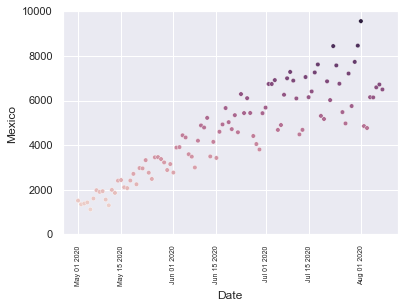

In [48]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

df3 = df2.pivot_table(index=['Date'], columns='Country', values='Diff', aggfunc='first').reset_index()

cmap = sns.cubehelix_palette(as_cmap=True)

ax = sns.scatterplot(x="Date", y="Mexico",hue='Mexico',
                     palette=cmap,legend=False, 
                     data=df3)

ax.tick_params('x', labelrotation=90, labelsize=7)

Comparemos directamente los paises de America con México en el ``scatterplot``.

Se observa que existe una **CORRELACIÓN positiva** en los datos, ¿cierto?

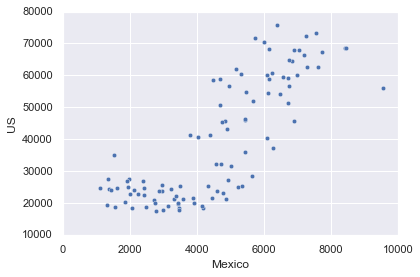

In [49]:
ax = sns.scatterplot(x="Mexico", y="US", data=df3)

Podriamos "constatar" esta relación utilizando una linea: 
$$y=b+mx$$

Tal que $b$ es la ordenada al origen y $m$ la pendiente de la linea.

Por lo pronto, dejemos que ``seaborn`` haga el trabajo pesado utilizando ``lmplot``.

#### La regresión muestra que existe una **CORRELACIÓN positiva**.

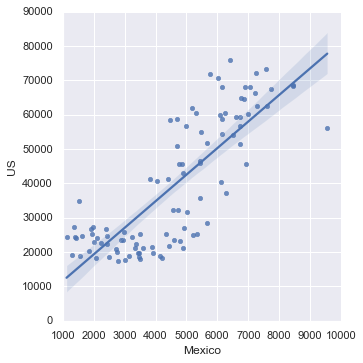

In [50]:
ax = sns.lmplot(x="Mexico", y="US",
                data=df3)

Examinemos a detalle el modelo de la regresión lineal usando ``statsmodel``.

¿Pueden identificar cual es el país de America que tiene mayor correlación de casos nuevos por día respecto a **México**?

In [51]:
import statsmodels.formula.api as smf

results = smf.ols('Mexico ~ Spain', data=df3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Mexico   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.395
Date:                Fri, 24 Sep 2021   Prob (F-statistic):              0.125
Time:                        14:17:46   Log-Likelihood:                -898.17
No. Observations:                 100   AIC:                             1800.
Df Residuals:                      98   BIC:                             1806.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4353.3018    238.427     18.258      0.0

# TAREA:

Hacer un **Dashboard** con los casos nuevos diarios de COVID19 por paises, de acuerdo a la idea de que existe **un patrón estacional**.

<img src="https://docs.google.com/uc?export=download&id=1Oc1fs0zpnYDKTTVeiQ8T5E0lxa99b1ME" width="800" align="middle">

El dashboard debe incluir al menos 1 de cada uno de los gráficos vistos en este sub-módulo (``hist``, ``hist2D``/``hexbin``, ``joyplot``, ``scatterplot``/``lmplot``).

Utilice como guía: https://matplotlib.org/3.2.1/tutorials/intermediate/gridspec.html

### Dashboard: 

Un "Dashboard" o tablero, es un tipo de interfaz gráfica que es utilizado para proporcionar una vista rápida de diversos indicadores (por ejemplo, en un negocio estos se llama indicadores clave de rendimiento -KPI-) relevantes para un objetivo particular. 

In [52]:
#Your answer here

In [53]:
#Your answer here

,Date,Country,Confirmed,Recovered,Deaths,Diff
47881,2020-01-23,Mexico,0,0,0,0.0
47882,2020-01-24,Mexico,0,0,0,0.0
47883,2020-01-25,Mexico,0,0,0,0.0
47884,2020-01-26,Mexico,0,0,0,0.0
47885,2020-01-27,Mexico,0,0,0,0.0
...,...,...,...,...,...,...
36955,2021-03-12,Japan,444977,423463,8515,1263.0
36956,2021-03-13,Japan,446312,424529,8566,1335.0
36957,2021-03-14,Japan,447287,425507,8587,975.0
36958,2021-03-15,Japan,448000,425507,8625,713.0


In [54]:
#Your answer here

Country,Date,China,India,Iran,Japan,"Korea, South",Mexico,Peru,Switzerland,US
0,2020-01-23,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-24,277.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2020-01-25,486.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-26,669.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0
4,2020-01-27,802.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
414,2021-03-12,67.0,24882.0,8088.0,1263.0,490.0,6816.0,7114.0,1333.0,61204.0
415,2021-03-13,57.0,25320.0,7802.0,1335.0,459.0,6104.0,8039.0,0.0,53215.0
416,2021-03-14,29.0,26291.0,7593.0,975.0,382.0,2415.0,5353.0,0.0,38222.0
417,2021-03-15,43.0,24492.0,7980.0,713.0,363.0,1439.0,4443.0,3170.0,56649.0


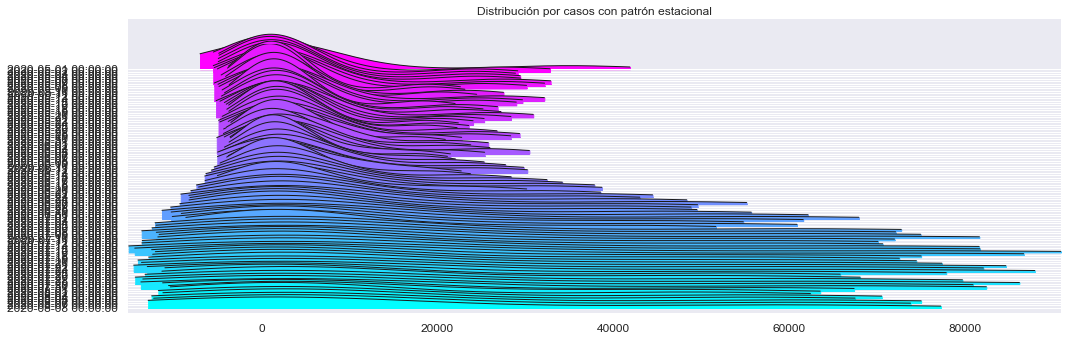

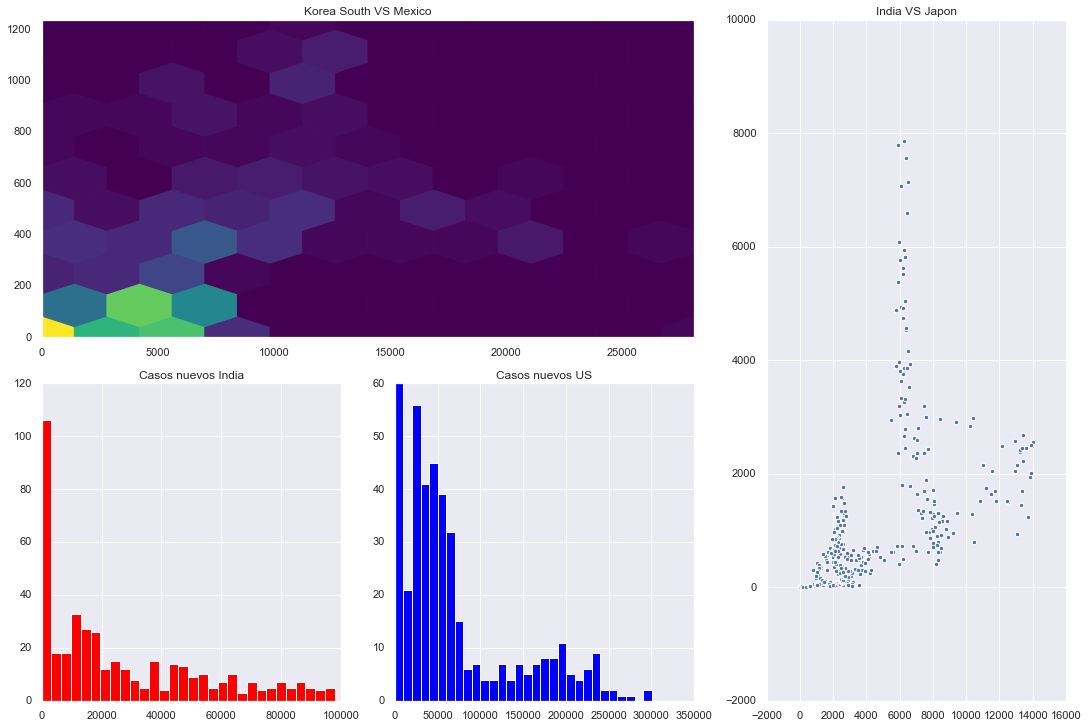

In [59]:
#Your answer here